#  This exercise shows how to take the videos file and the marks file and merge them based on the student number.  

The aim of this exercise is merge two files, one containing student number and marks, and the other containing student number and minutes videos watched.  I want to align these two datasets so that I can have the minutes watched and marks aligned


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [11]:
## Read cvs files in.
##  I needed to include the "encoding" argument because it wasnt reading it in.  I dont know what it means.

marks = pd.read_csv('2017MarksPrac.csv',encoding='windows-1252')
videos = pd.read_csv('2017Video.csv')

In [12]:
print(videos.shape)
print(marks.shape)

(748, 4)
(1038, 4)


## The first thing I did was to remove the NaNs out of the UserName column.
## The UserName column is the column that I will merge by.  It contains the student numbers of each student.

In [14]:
marks.dropna(subset = ['UserName'], inplace = True)  ## Inplace = True means that it will save the change to the marks DF
videos.dropna(subset = ['UserName'], inplace = True)

In [15]:
print(videos.shape)
print(marks.shape)

(748, 4)
(1036, 4)


# We can see below that the Marks Username and Videos Username columns are different datatypes, so this won't work when trying to merge.   So we need to convert the series into the same type, int.

In [5]:
print(marks.UserName.dtype)  ## we want to merge the DFs on Username, but it wont work if they are of different types
print(videos.UserName.dtype)

float64
int64


In [6]:
marks.UserName = marks.UserName.astype(np.int64)
videos.UserName = videos.UserName.astype(np.int64)
print(marks.UserName.dtype)
print(videos.UserName.dtype)

int64
int64


In [7]:
print('Marks')
print('============')
print(marks.info())
print('============================')
print('Videos')
print('=============')
print(videos.info())

Marks
<class 'pandas.core.frame.DataFrame'>
Int64Index: 1036 entries, 0 to 1037
Data columns (total 4 columns):
UserName     1036 non-null int64
Name         1036 non-null object
novexam      1036 non-null object
PHYS1015A    1036 non-null object
dtypes: int64(1), object(3)
memory usage: 40.5+ KB
None
Videos
<class 'pandas.core.frame.DataFrame'>
Int64Index: 748 entries, 0 to 747
Data columns (total 4 columns):
UserName                     748 non-null int64
Views                        748 non-null int64
Minutes Delivered            748 non-null float64
Average Minutes Delivered    748 non-null float64
dtypes: float64(2), int64(2)
memory usage: 29.2 KB
None


# Next we use the pd.merge function to merge based on UserName

In [100]:
main = pd.merge(marks,videos, on = 'UserName')
main.head()

,UserName,Name,novexam,PHYS1015A,Views,Minutes Delivered,Average Minutes Delivered
0,1624498.0,Ambrose ¸ Mark,53,59,20,77.793184,3.889659
1,1722250.0,Appalsamy ¸ Rochelle,17,41,59,359.662744,6.095979
2,721573.0,Asvat ¸ Naeem,59,u,6,51.543945,8.590658
3,1693702.0,Atsango ¸ Valentine,45,45,2,7.695481,3.847740
4,1617637.0,Babane ¸ Vusi,62,67,62,468.412196,7.555035


In [11]:
print(videos.shape)
print(marks.shape)
print(main.shape)


(748, 4)
(1036, 4)
(754, 7)


In [12]:
main[main.UserName == 1358583]

,UserName,Name,novexam,PHYS1015A,Views,Minutes Delivered,Average Minutes Delivered
541,1358583,Pahad ¸ Raeesa,73,61,19,96.620138,5.08527


In [93]:
main.head

NameError: name 'main' is not defined

In [13]:
%matplotlib inline

Text(0,0.5,'Final marks [%]')

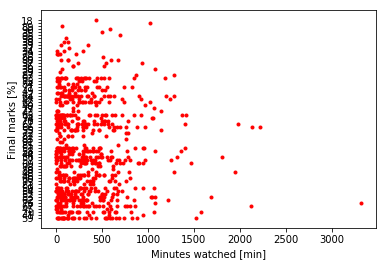

In [15]:
plt.plot(main['Minutes Delivered'], main.PHYS1015A,'r.')
plt.xlabel('Minutes watched [min]')
plt.ylabel('Final marks [%]')

# Merge_files function

In [175]:
def merge_files(df_m, df_v, merge_column, xPlot, yPlot):
    '''This function takes in two spreadsheets, df_m which includes student marks and student numbers & df_v which 
    includes student number and amount of videos watched.  The aim is to plot, for each student, the mark 
    vs the amount of videos watched.  First this function converts the spreadsheets to dataframes; then it removes
    any NANs in the column that we want to merge on  (merge_column).  Then it makes sure the merge_columns for both
    DFs is the same datatype.  Then it plots it.
    
    df_m: marks spreadsheet \n
    df_v: videos spreadsheet \n
    merge_column:  column that we want to merge the two DFs on \n
    xPlot: the minutes of videos watched, or number of views of videos
    yPlot: the marks for any assessment, like exam or semester test or final mark
    '''
    
    marks = pd.read_csv(df_m,encoding='windows-1252')  #convert into DF
    videos = pd.read_csv(df_v)  ## convert into DF
    print(marks.head())
    print('=============================================================')
    print('=============================================================')
    print(videos.head())
    print('=================')
    print('Original Marks DF shape is {}:'.format(marks.shape))
    print('=================')
    print('Original Videos DF shape is {}:'.format(videos.shape))
    marks.dropna(subset = [merge_column], inplace = True)  # Drop NAN ## Inplace = True means that it will save the change to the marks DF
    videos.dropna(subset = [merge_column], inplace = True) # Drop NAN 
    print('Marks DF shape is {}'.format(marks.shape))
    print('=================')
    print('Videos DF shape is {}'.format(videos.shape))
    ## Change the column to the same datatype, int64
    marks[merge_column] = marks[merge_column].astype(np.int64)
    videos[merge_column] = videos[merge_column].astype(np.int64)
    print('=================')
    print('Marks UserName dtype is {}'.format(marks[merge_column].dtype))
    print('=================')
    print('Videos UserName dtype is {}'.format(videos[merge_column].dtype))
    ##  Now we merge the two files based on 
    main = pd.merge(marks,videos, on = merge_column)
    print('=================')
    print('The merged file is called {} and it has a shape of {}.'.format('main', main.shape))
    ## Now we plot 
    plt.plot(main[xPlot], main[yPlot],'r.')
    plt.xlabel('Minutes watched [min]')
    plt.ylabel('Final marks [%]')
    print('=================')
    print('The statistical info on the minutes watched is:')
    print(main[xPlot].describe())
    print('=================')
    print('The statistical info on the marks is:')
    print('To be completed...')

    UserName                    Name novexam PHYS1015A
0  1624498.0        Ambrose ¸ Mark        53        59
1  1603354.0     Apollis ¸ Mikaeel        77        73
2  1722250.0  Appalsamy ¸ Rochelle        17        41
3   721573.0         Asvat ¸ Naeem        59         u
4  1693702.0   Atsango ¸ Valentine        45        45
   UserName  Views  Minutes Delivered  Average Minutes Delivered
0   1042701    106         856.850784                   8.083498
1   1061733      8          63.036341                   7.879543
2   1076559     22         109.114678                   4.959758
3   1124477      1           1.437761                   1.437761
4   1155040    204        1681.133483                   8.240850
Original Marks DF shape is (1038, 4):
Original Videos DF shape is (748, 4):
Marks DF shape is (1036, 4)
Videos DF shape is (748, 4)
Marks UserName dtype is int64
Videos UserName dtype is int64
The merged file is called main and it has a shape of (754, 7).
The statistical info on 

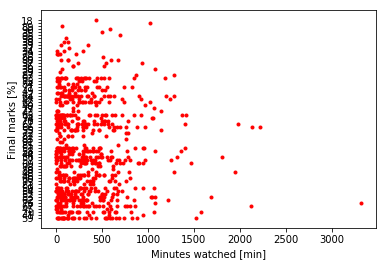

In [176]:
merge_files('2017MarksPrac.csv', '2017Video.csv', 'UserName','Minutes Delivered','PHYS1015A')

In [178]:
merge_files.__doc__

'This function takes in two spreadsheets, df_m which includes student marks and student numbers & df_v which \n    includes student number and amount of videos watched.  The aim is to plot, for each student, the mark \n    vs the amount of videos watched.  First this function converts the spreadsheets to dataframes; then it removes\n    any NANs in the column that we want to merge on  (merge_column).  Then it makes sure the merge_columns for both\n    DFs is the same datatype.  Then it plots it.\n    \n    df_m: marks spreadsheet \n\n    df_v: videos spreadsheet \n\n    merge_column:  column that we want to merge the two DFs on \n\n    xPlot: the minutes of videos watched, or number of views of videos\n    yPlot: the marks for any assessment, like exam or semester test or final mark\n    '